In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")


In [2]:
raw_path = "../data/raw_telemetry_logs/telemetry_logs.csv"
df_raw = pd.read_csv(raw_path)
df_raw.head()

,timestamp,vm_id,cpu_util,mem_util,disk_io,net_io,active_processes,vm_type,label_exhausted
0,2025-05-16T19:15:41.917822,vm_0000,0.417465,0.603087,151,272,171,memory_optimized,0
1,2025-05-16T19:20:41.917822,vm_0000,0.541856,0.702103,123,6,51,memory_optimized,0
2,2025-05-16T19:25:41.917822,vm_0000,0.534964,0.523599,0,1456,107,memory_optimized,0
3,2025-05-16T19:30:41.917822,vm_0000,0.108118,0.690074,34,283,64,memory_optimized,0
4,2025-05-16T19:35:41.917822,vm_0000,0.719847,0.454845,22,216,113,memory_optimized,0


In [3]:
print("Shape:", df_raw.shape)
print("Columns:", df_raw.columns.to_list())
print("Label counts:\n", df_raw["label_exhausted"].value_counts())

Shape: (1008000, 9)
Columns: ['timestamp', 'vm_id', 'cpu_util', 'mem_util', 'disk_io', 'net_io', 'active_processes', 'vm_type', 'label_exhausted']
Label counts:
 label_exhausted
0    857100
1    150900
Name: count, dtype: int64


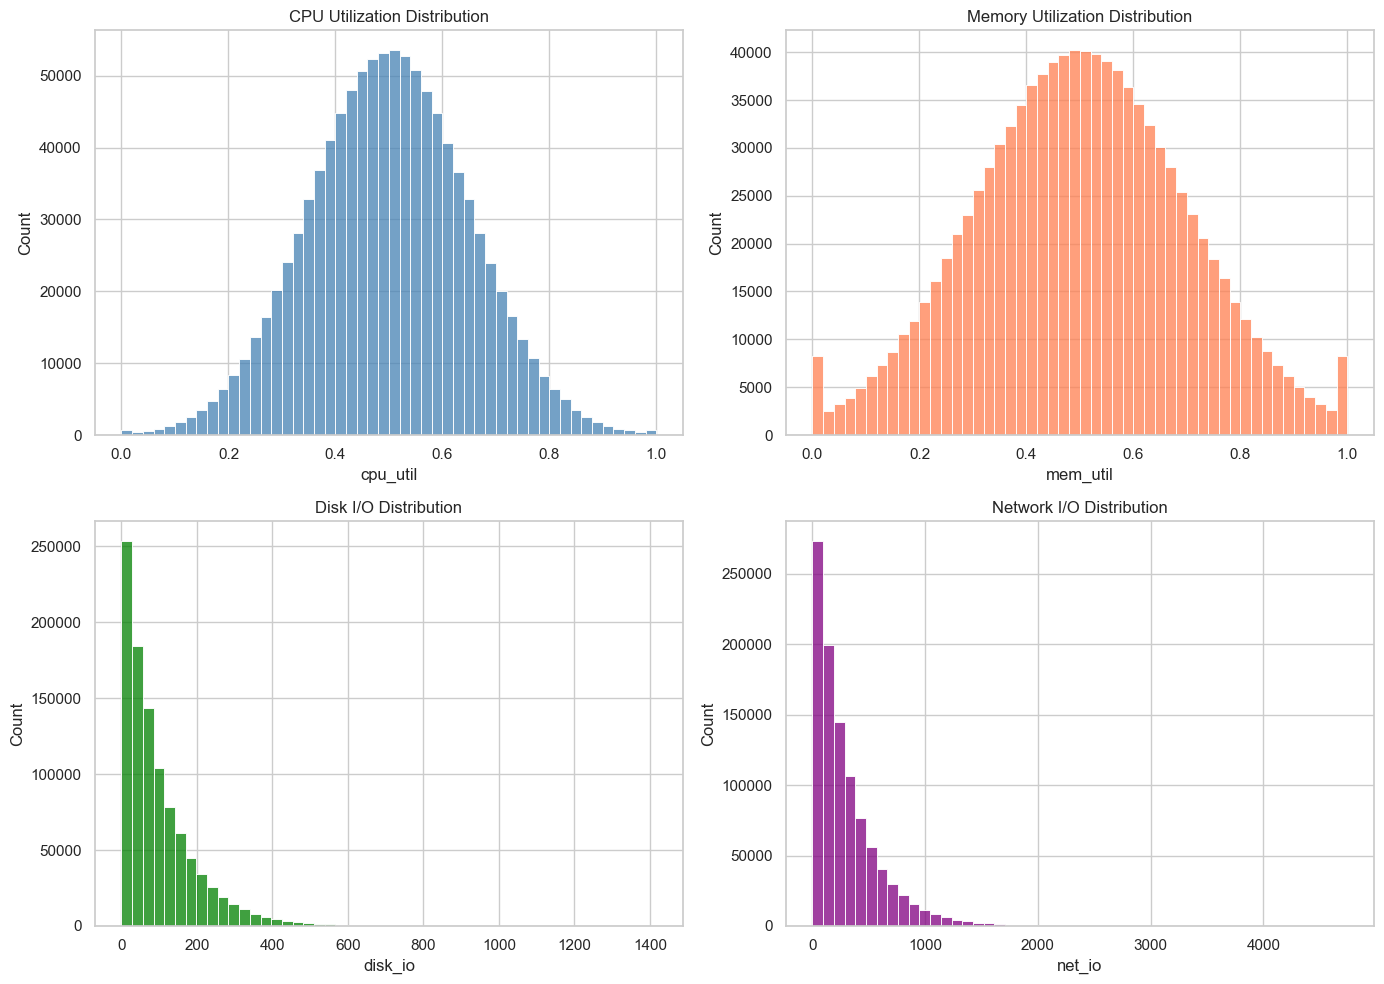

In [4]:
# Plot telemetry distributions
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df_raw["cpu_util"], bins=50, ax=axs[0, 0], color='steelblue')
axs[0, 0].set_title("CPU Utilization Distribution")

sns.histplot(df_raw["mem_util"], bins=50, ax=axs[0, 1], color='coral')
axs[0, 1].set_title("Memory Utilization Distribution")

sns.histplot(df_raw["disk_io"], bins=50, ax=axs[1, 0], color='green')
axs[1, 0].set_title("Disk I/O Distribution")

sns.histplot(df_raw["net_io"], bins=50, ax=axs[1, 1], color='purple')
axs[1, 1].set_title("Network I/O Distribution")

plt.tight_layout()


In [5]:
processed_path = "../data/processed/telemetry_features.parquet"
df_feat = pd.read_parquet(processed_path)
df_feat.head()

,timestamp,vm_id,cpu_util,mem_util,disk_io,net_io,active_processes,vm_type,label_exhausted,hour_of_day,day_of_week,io_ratio,cpu_mem_ratio,load_score
0,2025-05-16 23:15:41.917822,vm_0000,0.417465,0.603087,151,272,171,memory_optimized,0,19,6,0.556777,0.692213,43.052234
1,2025-05-16 23:20:41.917822,vm_0000,0.541856,0.702103,123,6,51,memory_optimized,0,19,6,17.714286,0.771761,19.402383
2,2025-05-16 23:25:41.917822,vm_0000,0.534964,0.523599,0,1456,107,memory_optimized,0,19,6,0.000686,1.021704,29.971419
3,2025-05-16 23:30:41.917822,vm_0000,0.108118,0.690074,34,283,64,memory_optimized,0,19,6,0.123239,0.156675,4.774987
4,2025-05-16 23:35:41.917822,vm_0000,0.719847,0.454845,22,216,113,memory_optimized,0,19,6,0.105991,1.582619,36.998320


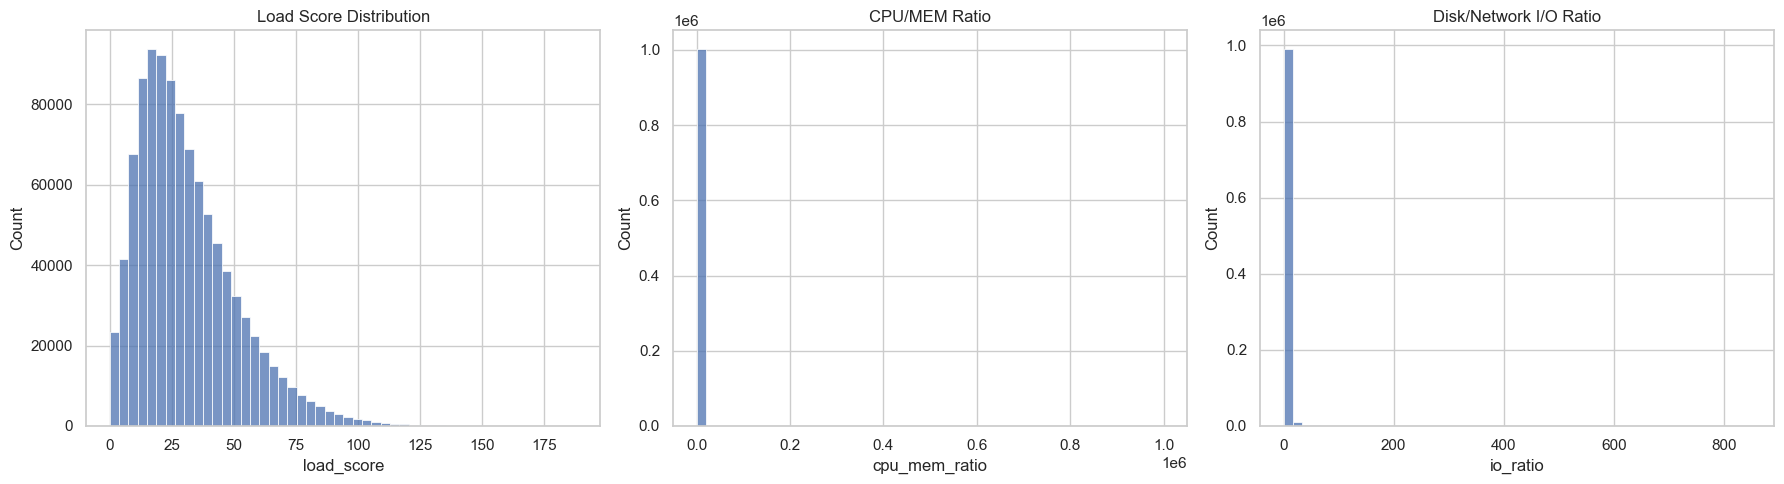

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df_feat["load_score"], bins=50, ax=axs[0])
axs[0].set_title("Load Score Distribution")

sns.histplot(df_feat["cpu_mem_ratio"], bins=50, ax=axs[1])
axs[1].set_title("CPU/MEM Ratio")

sns.histplot(df_feat["io_ratio"], bins=50, ax=axs[2])
axs[2].set_title("Disk/Network I/O Ratio")

plt.tight_layout()

Text(0.5, 1.0, 'Correlation Heatmap (Engineered Features)')

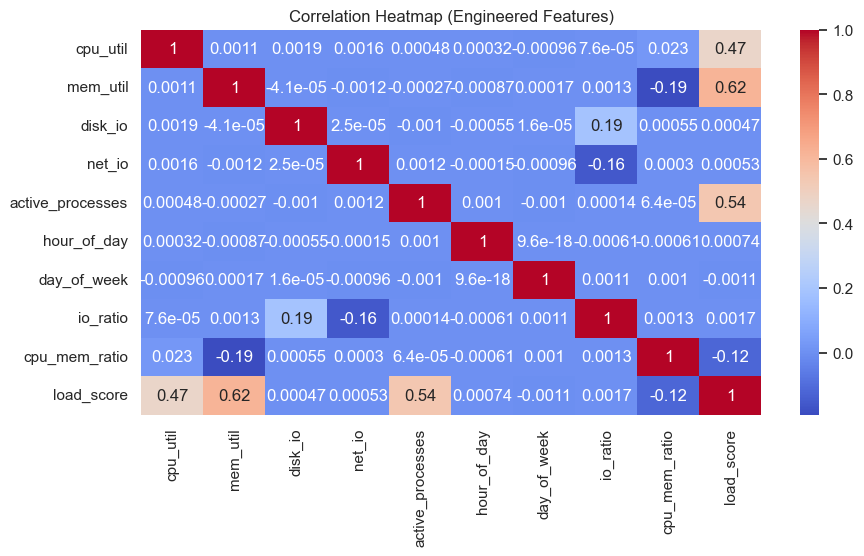

In [17]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
# Get numeric columns excluding the label column
label_col = "label_exhausted"
numeric_cols = df_feat.select_dtypes(include=["number"])

# Drop label if it's present
if label_col in numeric_cols.columns:
    numeric_cols = numeric_cols.drop(columns=[label_col])

# Plot correlation
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Engineered Features)")
